In [5]:
import boto3
import pandas as pd; pd.set_option('display.max_columns', 100)
import numpy as np

s3 = boto3.resource('s3')
bucket_name = 'data-445-timlincoln'
bucket = s3.Bucket(bucket_name)

file_key = 'Real_Estate.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

# Reading the data-file
house_price = pd.read_csv(file_content_stream)
house_price.head()

,No,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [6]:
# Dropping No
house_price = house_price.drop(columns = ['No', 'transaction_date'], axis = 1)
house_price.head()

,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [7]:
from sklearn.model_selection import train_test_split

# Defining the input and target
X = house_price.drop(columns = 'house_price_of_unit_area', axis = 1)
Y = house_price['house_price_of_unit_area']

# Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [8]:
from sklearn.linear_model import LinearRegression

# Building the linear model
lm_md = LinearRegression().fit(X_train, Y_train)

In [9]:
# Predicting on test
lm_pred = lm_md.predict(X_test)
lm_pred

array([45.99333982, 30.95448262, 49.27028792, 48.2282902 , 41.64028521,
       49.63160415, 36.15152157, 31.21334082, 28.98604081, 30.5398332 ,
       41.23999394, 43.94145037, 45.57426177, 44.16849133, 45.94821313,
       45.41287424, 29.45645027, 46.1287199 , 33.2559741 , 49.69163872,
       41.38066899, 44.71681029, 32.49576406,  2.57902669, 34.60342393,
       49.69163872, 42.42510244, 48.19915922, 12.06110144, 33.6910919 ,
       42.98327013, 40.79458716, 34.02113095, 42.69020346, 41.91679506,
       45.38682434, 46.56572589, 34.33170771, 33.49734023, 33.04072358,
       25.92822588, 47.18209428, 48.43988049, 53.73739383, 13.99524021,
       46.18352725, 25.90885244, 45.53507517, 42.14535437, 43.32297908,
       32.10015571, 28.91917489, 43.18105252, 51.9164283 , 51.84873826,
       52.00668168, 40.44183306,  8.33890691, 52.07437172, 12.25170606,
       36.13923932, 37.23727929, 52.00668168, 12.18346844, 33.51358768,
       46.01590317, 49.35857244, 38.04352798, 43.46385837, 21.85

Matplotlib is building the font cache; this may take a moment.


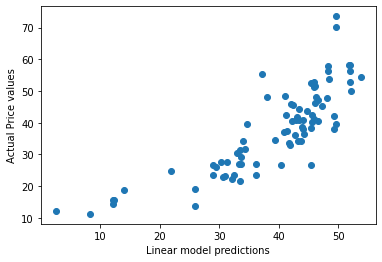

In [10]:
import matplotlib.pyplot as plt

plt.scatter(lm_pred, Y_test)
plt.xlabel('Linear model predictions')
plt.ylabel('Actual Price values')
plt.show()

In [11]:
# Computing the mse
np.mean((Y_test - lm_pred)**2)

57.202935912362406